## **Linear Analysis**

<img src="https://i.ibb.co/SyyyYtK/ma.png" alt="Linear" style="width:40%;">

In [2]:
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
import numpy as np

# read data from excel file 
df = pd.read_excel('ET_ToDoModerations.xlsx', sheet_name='Tabelle1')

# convert columns to numeric
columns_to_convert = ['MeanEntI']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# choose target columns and set index to subject
df_filtered = df[['Subject','MeanEntI']]
df_filtered.set_index('Subject', inplace=True)
df_filtered.head()

,MeanEntI
Subject,
1,3.333333
3,4.000000
4,6.000000
5,3.000000
8,3.000000


## **10-20 system for EEG-MCN**

<img src="https://upload.wikimedia.org/wikipedia/commons/3/38/International_10-20_system_for_EEG-MCN.png" alt="Descripción de la imagen" style="width:40%;">

In [5]:
# read data of the second file. this file contains the "Neural correlate" variable
file_path = 'Eyes_Closed_Power_1sec_8std_LowHighAlpha.xlsx'
data = pd.read_excel(file_path)
data = data.rename(columns={'subject': 'Subject'})
data.head(n=11)

,Pwelch,Freq_Range,Subject,Fp1,Fz,F3,F7,FT9,FC5,FC1,...,CP2,Cz,C4,T8,FT10,FC6,FC2,F4,F8,Fp2
0,Alpha1,8-13,1,2.166355,3.727387,2.608641,2.102079,1.889202,1.857811,2.492439,...,2.842643,2.232439,3.158065,2.095518,1.879904,1.732493,2.428483,2.481230,1.926087,2.080880
1,Alpha2,7.5-12.5,1,2.375574,4.227967,2.896096,2.291760,2.019173,2.002957,2.760788,...,3.179388,2.452528,3.559053,2.266007,2.015310,1.851851,2.684197,2.742428,2.082775,2.272462
2,Alpha3,7.5-10,1,2.423477,5.138892,3.083072,2.241608,2.006222,1.974604,3.165688,...,3.770536,2.874988,4.650151,2.440818,2.101567,1.946380,3.172428,3.078950,2.102142,2.373173
3,Alpha4,10-12.5,1,2.818687,4.374591,3.286844,2.822767,2.344258,2.412503,2.764564,...,3.569512,2.365784,3.963057,2.171237,1.992135,2.009630,2.726065,2.966487,2.339497,2.640903
4,Alpha5,7-13,1,2.060364,3.622914,2.496117,1.999488,1.852242,1.773822,2.634811,...,2.709259,2.346951,2.928237,2.026944,1.856703,1.658125,2.461522,2.381285,1.847536,1.981504
5,Delta,1-4,1,1.923669,1.932738,1.994235,2.787184,1.922428,1.367050,1.423039,...,1.385777,1.516827,1.276473,1.709842,1.958351,1.476434,1.516305,2.195713,3.559714,2.103251
6,Theta,4-8,1,1.305433,1.835137,1.488098,1.426086,1.515075,1.261478,1.883434,...,1.485679,1.822199,1.372794,1.478404,1.536917,1.256914,1.691409,1.499023,1.504003,1.310181
7,LowAlpha,7-10,1,1.615410,3.670711,2.146974,1.458145,1.564525,1.349055,2.999763,...,2.365785,2.733105,2.485123,2.143943,1.939213,1.480761,2.634182,2.198097,1.590537,1.608283
8,HighAlpha,10-13,1,1.909233,2.315883,2.134210,1.962551,1.772182,1.741018,1.819190,...,1.914749,1.589890,1.665978,1.750217,1.658241,1.518606,1.684538,1.883511,1.750032,1.788587
9,Beta,13-30,1,1.072756,1.128699,1.109588,1.088763,1.077538,1.085231,1.093311,...,1.085796,1.082556,1.108846,1.129875,1.111839,1.069889,1.099716,1.115249,1.088107,1.070253


## **Crivelli et al. (2023)** 

In [6]:
# Filter data for Beta power (13-30 Hz) in prefrontal areas (Fp1 and Fp2)
beta_power_Crivelli = data[data['Pwelch'] == 'Beta'][['Subject', 'Fp1', 'Fp2']]

# Extract the beta power values for Fp1 and Fp2 for all subjects
beta_power_per_subject_Crivelli = beta_power_Crivelli.set_index('Subject')

# Display the beta power values for all subjects for Fp1 and Fp2
beta_power_per_subject_Crivelli.head(len(beta_power_Crivelli))

,Fp1,Fp2
Subject,,
1,1.072756,1.070253
2,1.056350,1.044137
3,1.027768,1.030095
4,1.048186,1.040736
5,1.047954,1.042076
...,...,...
73,1.071727,1.086600
74,1.015028,1.014801
75,1.099317,1.101300


In [7]:
# Merge the two dataframes on the subject column. 
# This will add only the beta power values for Fp1 and Fp2 to the original dataframe
# And we will stay with the 42 patients who broke rules
df_Crivelli = df_filtered.merge(beta_power_per_subject_Crivelli, left_on='Subject', right_index=True)

print(df_Crivelli, "\n")
print("Number of subjects =", df_Crivelli.shape[0])

         MeanEntO       Fp1       Fp2
Subject                              
1        3.857143  1.072756  1.070253
3        4.000000  1.027768  1.030095
4        6.142857  1.048186  1.040736
5        4.000000  1.047954  1.042076
8        4.000000  1.035694  1.038385
12       2.285714  1.019040  1.018575
15       4.428571  1.044022  1.056443
16       5.000000  1.135740  1.133015
17       4.714286  1.066513  1.069410
18       5.142857  1.049120  1.044694
24       5.714286  1.013390  1.017534
26       6.571429  1.070860  1.079307
27       5.000000  1.044052  1.043231
28       3.571429  1.068749  1.068416
29       3.285714  1.049139  1.043913
32       3.428571  1.012253  1.012635
34       4.714286  1.042022  1.040938
35       4.571429  1.053275  1.043760
37       5.428571  1.014132  1.016534
40       6.285714  1.033956  1.026675
42       3.571429  1.056622  1.052582
43       4.428571  1.052607  1.054648
45       5.571429  1.112056  1.098932
49       5.571429  1.049677  1.042804
50       4.4

In [11]:
# simple linear regression model with Beta-Fp2
y_Crivelli = df_Crivelli['MeanEntO']
X_Crivelli = df_Crivelli[['Fp2']] # here we have 1 variable for simple regression.
X_Crivelli = sm.add_constant(X_Crivelli) # adding a constant

# fit the model
model_Crivelli_linear = sm.OLS(y_Crivelli, X_Crivelli)
results_Crivelli_linear = model_Crivelli_linear.fit()
summary_Crivelli_linear = results_Crivelli_linear.summary()
print(summary_Crivelli_linear)

                            OLS Regression Results                            
Dep. Variable:               MeanEntO   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.1896
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.666
Time:                        19:37:32   Log-Likelihood:                -54.554
No. Observations:                  42   AIC:                             113.1
Df Residuals:                      40   BIC:                             116.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3803      4.878      0.488      0.6

## **Balconi et al. (2023)**

In [12]:
# Filter data for Beta power (13-30 Hz) in TP9 channel
beta_power_Balconi = data[data['Pwelch'] == 'Beta'][['Subject', 'TP9']]

# Extract the beta power values for Fp1 and Fp2 for all subjects
beta_power_per_subject_Balconi = beta_power_Balconi.set_index('Subject')

# Display the beta power values for all subjects for Fp1 and Fp2
beta_power_per_subject_Balconi.head(len(beta_power_Balconi))

,TP9
Subject,
1,1.119720
2,1.099641
3,1.101869
4,1.114717
5,1.075328
...,...
73,1.198365
74,1.038484
75,1.111439


In [13]:
# Merge the two dataframes on the subject column. 
# This will add only the high alpha power values for Pz to the original dataframe
# And we will stay with the 42 patients who broke rules
df_Balconi = df_filtered.merge(beta_power_per_subject_Balconi, left_on='Subject', right_index=True)

print(df_Balconi, "\n")
print("Number of subjects =", df_Balconi.shape[0])

         MeanEntO       TP9
Subject                    
1        3.857143  1.119720
3        4.000000  1.101869
4        6.142857  1.114717
5        4.000000  1.075328
8        4.000000  1.066190
12       2.285714  1.059442
15       4.428571  1.070675
16       5.000000  1.185781
17       4.714286  1.113391
18       5.142857  1.133382
24       5.714286  1.224583
26       6.571429  1.194550
27       5.000000  1.456389
28       3.571429  1.182913
29       3.285714  1.093067
32       3.428571  1.044015
34       4.714286  1.141149
35       4.571429  1.240821
37       5.428571  1.142999
40       6.285714  1.081313
42       3.571429  1.079656
43       4.428571  1.082879
45       5.571429  1.136041
49       5.571429  1.073645
50       4.428571  1.251168
54       4.142857  1.129284
56       4.571429  1.091120
58       5.000000  1.111346
59       4.428571  1.124170
60       5.428571  1.028170
61       3.714286  1.060158
62       3.571429  1.330941
65       4.571429  1.068682
66       4.714286  1

In [14]:
# simple linear regression model with Alpha-Pz
y_Balconi = df_Balconi['MeanEntO']
X_Balconi = df_Balconi[['TP9']] # here we have 1 variable for linear regression.
X_Balconi = sm.add_constant(X_Balconi) # adding a constant

# fit the model
model_Balconi_ = sm.OLS(y_Balconi, X_Balconi)
results_Balconi_ = model_Balconi_.fit()
summary_Balconi_ = results_Balconi_.summary()
print(summary_Balconi_)

                            OLS Regression Results                            
Dep. Variable:               MeanEntO   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.428
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.239
Time:                        19:39:23   Log-Likelihood:                -53.917
No. Observations:                  42   AIC:                             111.8
Df Residuals:                      40   BIC:                             115.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1718      1.956      1.110      0.2

## **Chikhi et al. (2023)**

In [9]:
# Filter data for High Alpha power (10-12 Hz) in parieto-occipital areas (Pz)
alpha_power_Chikhi = data[data['Pwelch'] == 'HighAlpha'][['Subject', 'Pz']]

# Extract the High Alpha power values for Pz for all subjects
alpha_power_per_subject_Chikhi = alpha_power_Chikhi.set_index('Subject')

# Display the High Alpha power values for all subjects for Pz
alpha_power_per_subject_Chikhi.head(len(alpha_power_Chikhi))

,Pz
Subject,
1,3.711872e+00
2,2.254599e+00
3,1.113686e+00
4,1.380328e+07
5,1.272608e+00
...,...
73,1.030828e+01
74,1.374310e+00
75,1.688241e+00


In [22]:
# Merge the two dataframes on the subject column. 
# This will add only the high alpha power values for Pz to the original dataframe
# And we will stay with the 42 patients who broke rules
df_Chikhi = df_filtered.merge(alpha_power_per_subject_Chikhi, left_on='Subject', right_index=True)

print(df_Chikhi, "\n")
print("Number of subjects =", df_Chikhi.shape[0])

         MeanEntO            Pz
Subject                        
1        3.857143  3.711872e+00
3        4.000000  1.113686e+00
4        6.142857  1.380328e+07
5        4.000000  1.272608e+00
8        4.000000  2.100617e+00
12       2.285714  1.179487e+00
15       4.428571  1.202312e+00
16       5.000000  5.466692e+00
17       4.714286  1.438224e+00
18       5.142857  1.227569e+00
24       5.714286  1.069404e+00
26       6.571429  1.516610e+00
27       5.000000  2.219791e+00
28       3.571429  2.244057e+01
29       3.285714  1.623115e+00
32       3.428571  1.056469e+00
34       4.714286  1.327384e+00
35       4.571429  1.250113e+00
37       5.428571  1.712829e+00
40       6.285714  1.237682e+00
42       3.571429  1.386982e+02
43       4.428571  1.790998e+00
45       5.571429  3.467529e+00
49       5.571429  7.741987e+02
50       4.428571  4.561959e+05
54       4.142857  5.027969e+00
56       4.571429  1.640559e+02
58       5.000000  1.208791e+00
59       4.428571  6.480776e+00
60      

In [12]:
# simple linear regression model with HighAlpha-Pz
y_Chikhi = df_Chikhi['MeanEntO']
X_Chikhi = df_Chikhi[['Pz']] # here we have 1 variable for linear regression.
X_Chikhi = sm.add_constant(X_Chikhi) # adding a constant

# fit the model
model_Chikhi = sm.OLS(y_Chikhi, X_Chikhi)
results_Chikhi = model_Chikhi.fit()
summary_Chikhi = results_Chikhi.summary()
print(summary_Chikhi)

                            OLS Regression Results                            
Dep. Variable:               MeanEntO   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     3.609
Date:                Mon, 25 Mar 2024   Prob (F-statistic):             0.0647
Time:                        19:53:18   Log-Likelihood:                -52.840
No. Observations:                  42   AIC:                             109.7
Df Residuals:                      40   BIC:                             113.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4621      0.136     32.722      0.0

In [38]:
b, b1 = results_Chikhi.params

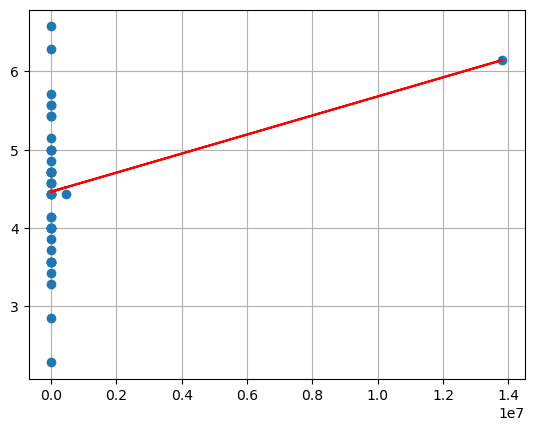

In [54]:
plt.plot(df_Chikhi['Pz'], df_Chikhi['MeanEntO'], 'o')
plt.plot(df_Chikhi['Pz'], b + b1 * df_Chikhi['Pz'], 'r')
plt.grid()

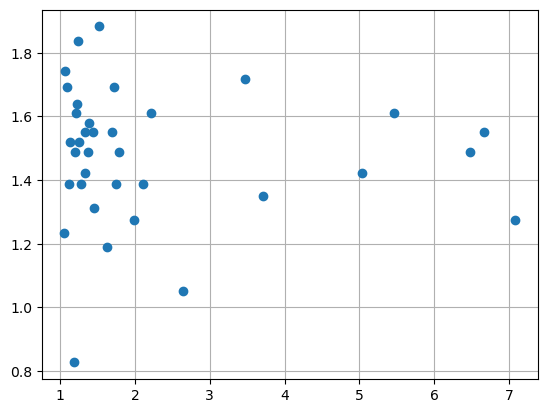

In [80]:
Q1 = df_Chikhi['Pz'].quantile(0.25)
Q3 = df_Chikhi['Pz'].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_sin_outliers = df_Chikhi[(df_Chikhi['Pz'] > limite_inferior) & 
                             (df_Chikhi['Pz'] < limite_superior)]

plt.plot(df_sin_outliers['Pz'], np.log(df_sin_outliers['MeanEntO']), 'o')
plt.grid()

 mu = 0.134560, sigma = 0.498303


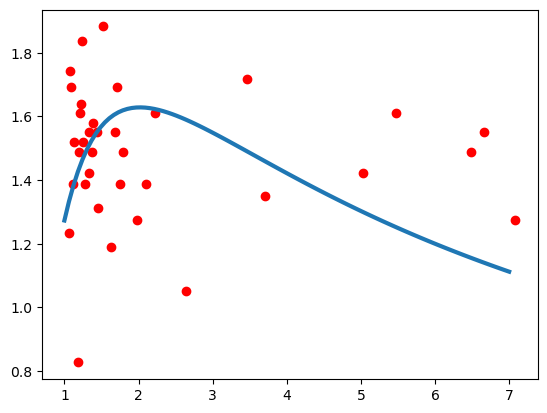

R^2 = -0.47518307009742133


In [83]:
from scipy.optimize import curve_fit
from scipy.stats import norm

# Definir la función a ajustar
# def log_logistic(x, beta, alpha):
#     return alpha*beta*((beta*x)**(alpha-1)) / (1 + (beta*x)**alpha)

def lognormal_hazard(x, mu, sigma):
    """
    Calcula la función de riesgo para la distribución log-normal en un tiempo dado.

    Parámetros:
        - x: Tiempo en el cual se evalúa la función de riesgo.
        - mu: Media de la distribución log-normal.
        - sigma: Desviación estándar de la distribución log-normal.

    Retorna:
        - h(t): Función de riesgo en el tiempo t.
    """
    ln_t = np.log(x)
    pdf = (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-((ln_t - mu)**2) / (2 * sigma**2))
    survival = 1 - norm.cdf((ln_t - mu) / sigma)
    hazard = pdf / survival
    return hazard

popt, pcov = curve_fit(lognormal_hazard, df_sin_outliers['Pz'], np.log(df_sin_outliers['MeanEntO']))

print(" mu = %f, sigma = %f" % (popt[0], popt[1]))

y = lognormal_hazard(np.linspace(1, 7, 100), *popt)

plt.plot(df_sin_outliers['Pz'], np.log(df_sin_outliers['MeanEntO']), 'ro', label='data')
plt.plot(np.linspace(1, 7, 100), y, linewidth=3.0, label='fit')
plt.show()

y_data = np.log(df_sin_outliers['MeanEntO'])
y_fit =lognormal_hazard(df_sin_outliers['Pz'], *popt)
mean_y_data = np.mean(y_data)

r_squared = 1 - np.sum((y_data - y_fit)**2) / np.sum((y_data - mean_y_data)**2)

print("R^2 =", r_squared)

# **Theta midline**

In [25]:
# Filter data for frontal-midline theta power (4-7 Hz) in parieto-occipital areas (Pz)
theta_rows = data[data['Pwelch'].str.contains("Theta", case=False)][['Subject', 'Pz']]

# Extract the frontal-midline theta power values for Pz for all subjects
theta_power_per_subject = theta_rows.set_index('Subject')

# Display the High Alpha power values for all subjects for Pz
theta_power_per_subject.head(len(theta_rows))

,Pz
Subject,
1,1.356176
2,1.205328
3,1.167619
4,1.411472
5,1.177179
...,...
73,2.177900
74,1.171582
75,5.139116


In [27]:
# Merge the two dataframes on the subject column. 
# This will add only the frontal-midline theta power values for Pz to the original dataframe
# And we will stay with the 42 patients who broke rules
df_theta = df_filtered.merge(theta_power_per_subject, left_on='Subject', right_index=True)

print(df_theta, "\n")
print("Number of subjects =", df_theta.shape[0])

         MeanEntO        Pz
Subject                    
1        3.857143  1.356176
3        4.000000  1.167619
4        6.142857  1.411472
5        4.000000  1.177179
8        4.000000  1.389067
12       2.285714  1.368186
15       4.428571  1.172869
16       5.000000  7.816792
17       4.714286  1.223912
18       5.142857  1.140248
24       5.714286  1.077334
26       6.571429  1.573921
27       5.000000  1.303110
28       3.571429  1.229642
29       3.285714  1.828381
32       3.428571  1.137647
34       4.714286  1.220954
35       4.571429  1.243029
37       5.428571  1.090384
40       6.285714  1.065915
42       3.571429  1.469356
43       4.428571  1.270917
45       5.571429  1.421322
49       5.571429  1.299955
50       4.428571  6.565503
54       4.142857  1.422337
56       4.571429  1.231269
58       5.000000  1.486925
59       4.428571  1.159371
60       5.428571  1.102736
61       3.714286  1.208568
62       3.571429  1.210314
65       4.571429  1.152224
66       4.714286  1

In [28]:
# simple linear regression model with theta-midline-Pz
y_theta = df_theta['MeanEntO']
X_theta = df_theta[['Pz']] # here we have 1 variable for linear regression.
X_theta = sm.add_constant(X_theta) # adding a constant

# fit the model
model_theta = sm.OLS(y_theta, X_theta)
results_theta = model_theta.fit()
summary_theta = results_theta.summary()
print(summary_theta)

                            OLS Regression Results                            
Dep. Variable:               MeanEntO   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                   0.09733
Date:                Mon, 25 Mar 2024   Prob (F-statistic):              0.757
Time:                        19:47:01   Log-Likelihood:                -54.603
No. Observations:                  42   AIC:                             113.2
Df Residuals:                      40   BIC:                             116.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4507      0.220     20.265      0.0

## **Zhu et al. (2023)**

In [5]:
N2_path = 'N2.txt'
N2 = pd.read_csv(N2_path, delim_whitespace=True)

# Create the 'Subject' column by extracting the number after 'S' in the 'ERPset' column
N2['Subject'] = N2['ERPset'].str.extract('_(\d+)\.erp').astype(int)

# Set the index of the dataframe to this 'Subject' column
N2.set_index('Subject', inplace=True)
N2.head()

ValueError: cannot convert float NaN to integer

In [28]:
# Merge the two dataframes on the subject column. 
# This will add only the frontal-midline theta power values for Pz to the original dataframe
# And we will stay with the 42 patients who broke rules
df_N2 = df_filtered.merge(N2, left_on='Subject', right_index=True)

print(df_N2, "\n")
print("Number of subjects =", df_N2.shape[0])

         MeanEntO  bin2_Fz  bin2_FC1  bin2_FC2  \
Subject                                          
1        3.857143    0.261    -6.031     7.054   
3        4.000000   27.521    20.580    10.713   
4        6.142857    4.422     0.938     5.940   
5        4.000000    0.657     0.776    -1.003   
8        4.000000    3.350     2.099    -3.234   
12       2.285714    2.120     2.319     1.289   
15       4.428571    3.695     4.397     4.220   
16       5.000000    6.190     4.055     5.910   
17       4.714286    4.307     2.569     2.539   
18       5.142857    0.159     4.493     4.339   
24       5.714286    2.369     2.591     0.621   
26       6.571429    4.467     3.003    13.239   
28       3.571429    5.144     4.790     5.720   
29       3.285714    5.152     5.680     3.467   
32       3.428571    4.320    -1.827     1.843   
34       4.714286    2.310     1.487     2.195   
35       4.571429    3.380     5.287    -9.508   
37       5.428571    2.347     2.224     1.905   


In [1]:
# simple linear regression model with theta-midline-Pz
y_N2 = df_N2['MeanEntO']
X_N2 = df_N2[['bin2_FC2']] # here we have 1 variable for linear regression.
X_N2 = sm.add_constant(X_N2) # adding a constant

# fit the model
model_N2 = sm.OLS(y_N2, X_N2)
results_N2 = model_N2.fit()
summary_N2 = results_N2.summary()
print(summary_N2)

NameError: name 'df_N2' is not defined

## **Fischer-Jbali et al. (2022)**

In [32]:
P3_path = 'P3.txt'
P3 = pd.read_csv(P3_path, delim_whitespace=True)

# Create the 'Subject' column by extracting the number after 'S' in the 'ERPset' column
P3['Subject'] = P3['ERPset'].str.extract('_(\d+)\.erp').astype(int)

# Set the index of the dataframe to this 'Subject' column
P3.set_index('Subject', inplace=True)
P3.head()

,bin2_CP1,bin2_Pz,bin2_O1,bin2_O2,bin2_CP2,ERPset
Subject,,,,,,
1,-2.739,4.524,-5.021,3.795,5.774,Interpolate_VoltRej_Epoched_ICALabel_ChanRemv_...
3,16.809,11.982,12.149,6.533,19.390,Interpolate_VoltRej_Epoched_ICALabel_ChanRemv_...
4,4.522,-0.149,-2.099,5.514,2.330,Interpolate_VoltRej_Epoched_ICALabel_ChanRemv_...
5,5.018,3.984,4.609,3.039,3.031,Interpolate_VoltRej_Epoched_ICALabel_ChanRemv_...
8,3.278,2.272,1.625,3.407,2.068,Interpolate_VoltRej_Epoched_ICALabel_ChanRemv_...


In [33]:
# Merge the two dataframes on the subject column. 
# This will add only the frontal-midline theta power values for Pz to the original dataframe
# And we will stay with the 42 patients who broke rules
df_P3 = df_filtered.merge(P3, left_on='Subject', right_index=True)

print(df_P3, "\n")
print("Number of subjects =", df_P3.shape[0])

         MeanEntO  bin2_CP1  bin2_Pz  bin2_O1  bin2_O2  bin2_CP2  \
Subject                                                            
1        3.857143    -2.739    4.524   -5.021    3.795     5.774   
3        4.000000    16.809   11.982   12.149    6.533    19.390   
4        6.142857     4.522   -0.149   -2.099    5.514     2.330   
5        4.000000     5.018    3.984    4.609    3.039     3.031   
8        4.000000     3.278    2.272    1.625    3.407     2.068   
12       2.285714     1.283    2.486    3.471    3.029     1.278   
15       4.428571     2.642    1.474   -3.858    1.888     2.369   
16       5.000000     6.506    5.110   -0.778   -0.596     1.333   
17       4.714286    -2.349    8.390   -2.018    4.739     2.893   
18       5.142857     0.901    2.866    1.101    2.781     1.838   
24       5.714286     2.147    1.602   -1.416    0.593     1.240   
26       6.571429     2.172    2.490    0.458    3.599     4.595   
28       3.571429     3.153    4.953    1.057   

In [37]:
# simple linear regression model with theta-midline-Pz
y_P3 = df_P3['MeanEntO']
X_P3 = df_P3[['bin2_CP2']] # here we have 1 variable for linear regression.
X_P3 = sm.add_constant(X_P3) # adding a constant

# fit the model
model_P3 = sm.OLS(y_P3, X_P3)
results_P3 = model_P3.fit()
summary_P3 = results_P3.summary()
print(summary_P3)

                            OLS Regression Results                            
Dep. Variable:               MeanEntO   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                   0.01053
Date:                Mon, 01 Apr 2024   Prob (F-statistic):              0.919
Time:                        12:03:57   Log-Likelihood:                -52.129
No. Observations:                  40   AIC:                             108.3
Df Residuals:                      38   BIC:                             111.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4507      0.196     22.683      0.0

## **ALL parameters**

In [91]:
electrodos_eeg = [
    "Fp1", "Fz", "F3", "F7", "FT9", "FC5", "FC1", "C3", "T7", "TP9",
    "CP5", "CP1", "Pz", "P3", "P7", "O1", "Oz", "O2", "P4", "P8",
    "TP10", "CP6", "CP2", "Cz", "C4", "T8", "FT10", "FC6", "FC2",
    "F4", "F8", "Fp2"
]

pwelch_electrode = [data[data['Pwelch'] == 'Gamma'][['Subject', electrode]] for electrode in electrodos_eeg]

df_pwelch = [df_filtered.merge(electrode, left_on='Subject', right_on='Subject') for electrode in pwelch_electrode]
df_pwelch_with_index = [df.set_index('Subject') for df in df_pwelch]
df_pwelch_with_index[1].head(11)


NameError: name 'data' is not defined

In [55]:
df_pwelch_no_outliers = list()

for i in range(len(df_pwelch_with_index)):
    Q1 = df_pwelch_with_index[i][electrodos_eeg[i]].quantile(0.25)
    Q3 = df_pwelch_with_index[i][electrodos_eeg[i]].quantile(0.75)

    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_pwelch_no_outliers.append(df_pwelch_with_index[i][(df_pwelch_with_index[i][electrodos_eeg[i]] > limite_inferior) & 
                                                          (df_pwelch_with_index[i][electrodos_eeg[i]] < limite_superior)])

df_pwelch_no_outliers[1].head(11)

,MeanEntI,Fz
Subject,,
1,3.333333,3.622914
3,4.000000,1.229132
4,6.000000,22.252306
5,3.000000,3.311256
8,3.000000,1.745793
12,2.000000,1.254609
15,5.666667,1.673071
17,4.833333,1.857060
18,2.833333,17.461243


In [28]:
prob_f_statistic_list = list()

for i in range(len(electrodos_eeg)):
    y = df_pwelch_with_index[i]['MeanEntO']
    X = df_pwelch_with_index[i][electrodos_eeg[i]]
    X = sm.add_constant(X) # adding a constant

    # fit the model
    model = sm.OLS(y, X)
    results = model.fit()
    
    prob_f_statistic_list.append(results.f_pvalue)

prob_f_statistic_list

[0.9335270196937692,
 0.4694448402956569,
 0.6168835325665976,
 0.5594978658705678,
 0.7616583743998914,
 0.4290571079317087,
 0.6478524064351849,
 0.656910449000264,
 0.8649719505383079,
 0.4301151154919628,
 0.6731749411537116,
 0.6865595998650036,
 0.7278642294335367,
 0.41426666592774775,
 0.11203659033529872,
 0.3127510665478638,
 0.34421417776416285,
 0.44121377720593913,
 0.7140897559528643,
 0.3646114945482294,
 0.27794018963373557,
 0.8996660803830363,
 0.31584937855447115,
 0.36001907476085304,
 0.4907777839266432,
 0.6392613732076265,
 0.2154809981751614,
 0.4882054381274359,
 0.6488311715943036,
 0.49719421445086287,
 0.19432425450409366,
 0.7972819582942541]

## **B1 & B2**

<!-- ## **Bin1 & Bin2** -->

In [6]:
# read data of the second file. this file contains the "Neural correlate" variable
file_path_ = 'CRB_Power_B1B2.xlsx'
data_ = pd.read_excel(file_path_)
data_ = data_.rename(columns={'subid': 'Subject'})
data_ = data_.rename(columns={'Freq_Names': 'Pwelch'})
data_.head(n=11)

,Subject,Pwelch,Freq_Range,Fp1_B1,Fz_B1,F3_B1,F7_B1,FT9_B1,FC5_B1,FC1_B1,...,CP2_B1B2,Cz_B1B2,C4_B1B2,T8_B1B2,FT10_B1B2,FC6_B1B2,FC2_B1B2,F4_B1B2,F8_B1B2,Fp2_B1B2
0,1,Alpha1,8-13,1.574944,1.131760,1.149693,2.445812,2.729598,1.390809,1.076905,...,-0.099672,-0.072723,0.238777,0.067316,0.022522,0.156690,-0.002192,0.245484,2.764339e-01,0.425129
1,1,Alpha2,7.5-12.5,1.678995,1.150476,1.177962,2.700928,2.690499,1.371074,1.091804,...,-0.103082,-0.077621,0.312611,-0.161839,0.163047,0.174613,0.013453,0.305248,4.941297e-01,0.600868
2,1,Alpha3,7.5-10,2.087686,1.111090,1.196003,3.644277,3.257629,1.458704,1.072656,...,-0.016771,-0.078365,0.257725,-0.135732,-0.422604,0.026532,-0.107359,-0.072347,-9.218478e-02,1.146973
3,1,Alpha4,10-12.5,1.237403,1.192537,1.197864,2.617838,2.973902,1.404981,1.117361,...,-0.183128,-0.119088,0.638057,-0.210393,0.541188,0.489204,0.143073,0.622047,5.339100e-01,-0.172043
4,1,Alpha5,7-13,1.982335,1.244048,1.399974,3.818046,2.827538,1.455951,1.130933,...,-0.106670,-0.057375,0.174063,0.077008,0.059045,0.062814,-0.018880,0.154807,-1.964164e-02,0.329670
5,1,Delta,1-4,3.045322,1.203535,1.362544,21.963043,7.336883,2.213346,1.144135,...,-0.247771,-0.431035,-0.076798,-59.145308,-8462.793426,-72.759723,-0.321863,-3.037844,-2.450248e+06,-0.327557
6,1,Theta,4-8,3.476032,1.412706,1.578817,4.669491,3.883494,1.375351,1.228945,...,-0.059905,-0.105139,-0.144633,-0.927380,-2.545107,-0.823080,-0.103857,-0.218275,-8.102127e+00,5.730751
7,1,lowAlpha,7-10,3.036481,1.364183,1.732625,5.900859,2.648655,1.495744,1.187345,...,-0.038229,0.001291,-0.188446,-0.014286,-0.176715,-0.364996,-0.160320,-0.243052,-3.090582e-01,1.092462
8,1,highAlpha,10-12,1.065958,1.209554,1.150899,1.285904,1.839802,1.239629,1.120526,...,-0.232549,-0.076506,0.394941,-0.201000,1.041524,0.396733,0.194671,0.871641,1.373602e+00,-0.218290
9,1,Beta,13-30,1.218341,1.027906,1.166952,1.502442,1.615679,1.186048,1.036654,...,-0.022311,-0.022957,-0.018496,-0.138191,-0.074146,0.128095,-0.019977,-0.007065,1.358166e-01,-0.074894


In [27]:
B1_electrodes = [
    "Fp1_B1", "Fz_B1", "F3_B1", "F7_B1", "FT9_B1", "FC5_B1", "FC1_B1", "C3_B1", "T7_B1", "TP9_B1",
    "CP5_B1", "CP1_B1", "Pz_B1", "P3_B1", "P7_B1", "O1_B1", "Oz_B1", "O2_B1", "P4_B1", "P8_B1",
    "TP10_B1", "CP6_B1", "CP2_B1", "Cz_B1", "C4_B1", "T8_B1", "FT10_B1", "FC6_B1", "FC2_B1",
    "F4_B1", "F8_B1", "Fp2_B1"
]

B2_electrodes = [
    "Fp1_B2", "Fz_B2", "F3_B2", "F7_B2", "FT9_B2", "FC5_B2", "FC1_B2", "C3_B2", "T7_B2", "TP9_B2",
    "CP5_B2", "CP1_B2", "Pz_B2", "P3_B2", "P7_B2", "O1_B2", "Oz_B2", "O2_B2", "P4_B2", "P8_B2",
    "TP10_B2", "CP6_B2", "CP2_B2", "Cz_B2", "C4_B2", "T8_B2", "FT10_B2", "FC6_B2", "FC2_B2",
    "F4_B2", "F8_B2", "Fp2_B2"
]

B1B2_electrodes = [
    'Fp1_B1B2', 'Fz_B1B2', 'F3_B1B2', 'F7_B1B2', 'FT9_B1B2', 'FC5_B1B2', 'FC1_B1B2',
    'C3_B1B2', 'T7_B1B2', 'TP9_B1B2', 'CP5_B1B2', 'CP1_B1B2', 'Pz_B1B2', 'P3_B1B2',
    'P7_B1B2', 'O1_B1B2', 'Oz_B1B2', 'O2_B1B2', 'P4_B1B2', 'P8_B1B2', 'TP10_B1B2',
    'CP6_B1B2', 'CP2_B1B2', 'Cz_B1B2', 'C4_B1B2', 'T8_B1B2', 'FT10_B1B2', 'FC6_B1B2',
    'FC2_B1B2', 'F4_B1B2', 'F8_B1B2', 'Fp2_B1B2'
]


pwelch_B1B2 = [data_[data_['Pwelch'] == 'Beta'][['Subject', electrode]] for electrode in B1B2_electrodes]

df_pwelch_ = [df_filtered.merge(electrode, left_on='Subject', right_on='Subject') for electrode in pwelch_B1B2]
df_pwelch_with_index_ = [df.set_index('Subject') for df in df_pwelch_]
df_pwelch_with_index_[1].head(11)

,MeanEntI,Fz_B1B2
Subject,,
1,3.333333,-0.064338
3,4.000000,0.005250
4,6.000000,-0.002892
5,3.000000,0.036037
8,3.000000,-0.039982
12,2.000000,-0.004489
15,5.666667,-0.001993
16,3.000000,0.074694
17,4.833333,-0.009926


In [28]:
prob_f_statistic_list_ = list()

for i in range(len(B1B2_electrodes)):
    y = df_pwelch_with_index_[i]['MeanEntI']
    X = df_pwelch_with_index_[i][B1B2_electrodes[i]]
    X = sm.add_constant(X) # adding a constant

    # fit the model
    model = sm.OLS(y, X)
    results = model.fit()
    
    prob_f_statistic_list_.append(results.f_pvalue)

prob_f_statistic_list_

[0.8767551668211451,
 0.9319150163693776,
 0.9158889572154278,
 0.11387018159420431,
 0.6728972190560134,
 0.9369602201119016,
 0.5365979234953951,
 0.5710858606812137,
 0.9797054293138642,
 0.40425405345168075,
 0.4498363102381785,
 0.2253423830232361,
 0.01731723387413106,
 0.7044612823939338,
 0.6308774227942207,
 0.9632205638117157,
 0.6813023003383254,
 0.7432763128465016,
 0.6711847380209075,
 0.8257735450464133,
 0.8138111236833226,
 0.47130865063609517,
 0.25209621156619777,
 0.16499723303696218,
 0.2765557932241392,
 0.19692657374368824,
 0.3671149972737534,
 0.43317830925686185,
 0.6764856597497603,
 0.31430793313254807,
 0.4209487437793167,
 0.9933515632887424]